In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import random
import scipy.stats as stats
import scanpy as sc
from scipy.stats import pearsonr
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Helvetica'

In [51]:
#from DOI: 10.1126/science.aav8130
snRNA = sc.read_text("exprMatrix.tsv.gz")
meta = pd.read_csv("meta.tsv", sep="\t")

In [52]:
snRNA.var = meta

In [53]:
snRNA.obs.index = [x.split("|")[1] for x in snRNA.obs.index.tolist()]

In [133]:
plotting = snRNA['SLITRK4'].to_df().T
plotting['ANGEL2'] = snRNA['ANGEL2'].to_df().T
plotting['KHDRBS2'] = snRNA['KHDRBS2'].to_df().T
plotting['PROC'] = snRNA['PROC'].to_df().T
plotting['LDHB'] = snRNA['LDHB'].to_df().T
plotting['Diagnosis'] = snRNA.var['diagnosis'].values
plotting['cluster'] = snRNA.var['cluster'].values
plotting['individual'] = snRNA.var['individual'].values
plotting['sex'] = snRNA.var['sex'].values

In [134]:
plotting.to_csv('plotting.csv')

In [135]:
plotting_L23 = plotting.query("`cluster` == 'L2/3'")

In [136]:
plotting_L23.to_csv('plotting_L23.csv')

In [278]:
plotting_L23 = pd.read_csv('plotting_L23.csv')

In [279]:
plotting_L23 = plotting_L23.drop(columns=['cluster']).drop(columns=['sex'])

In [280]:
plotting_L23['SLITRK4'] = 2 ** plotting_L23['SLITRK4'] - 1
plotting_L23['KHDRBS2'] = 2 ** plotting_L23['KHDRBS2']- 1
plotting_L23['PROC'] = 2 ** plotting_L23['PROC'] - 1
plotting_L23['LDHB'] = 2 ** plotting_L23['LDHB'] - 1

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


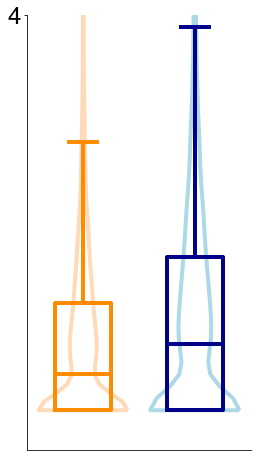

In [259]:
plt.figure(figsize=(4,8))
sns.boxplot(plotting_L23, x='Diagnosis', y='SLITRK4', fill=False, width=0.5, showfliers=False, 
            hue='Diagnosis', palette=['darkorange', 'darkblue'], linewidth=4)
sns.violinplot(plotting_L23, x='Diagnosis', y='SLITRK4', fill=False, inner=None, 
            hue='Diagnosis', palette=['peachpuff', 'lightblue'], cut=0, linewidth=4)
plt.ylim(-0.4,4)
plt.yticks([4], fontsize=24)
plt.ylabel('')
plt.xticks([])
plt.xlabel('')

sns.despine(right=True)
#plt.savefig('SLITRK4_snRNA.pdf', dpi=1000)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


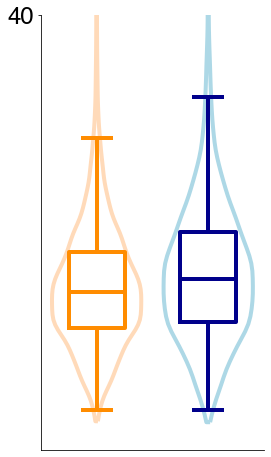

In [260]:
plt.figure(figsize=(4,8))
sns.boxplot(plotting_L23, x='Diagnosis', y='KHDRBS2', fill=False, width=0.5, showfliers=False, 
            hue='Diagnosis', palette=['darkorange', 'darkblue'], linewidth=4)
sns.violinplot(plotting_L23, x='Diagnosis', y='KHDRBS2', fill=False, inner=None, 
            hue='Diagnosis', palette=['peachpuff', 'lightblue'], cut=1, linewidth=4)
plt.ylim(-4,40)
plt.yticks([40], fontsize=24)
plt.ylabel('')
plt.xticks([])
plt.xlabel('')

sns.despine(right=True)
#plt.savefig('KHDRBS2_snRNA.pdf', dpi=1000)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


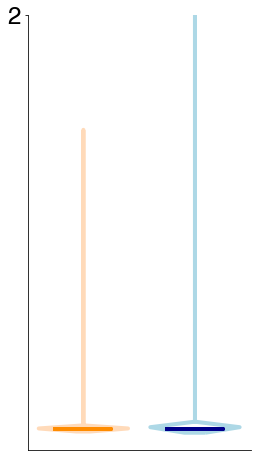

In [263]:
plt.figure(figsize=(4,8))
sns.boxplot(plotting_L23, x='Diagnosis', y='PROC', fill=False, width=0.5, showfliers=False, 
            hue='Diagnosis', palette=['darkorange', 'darkblue'], linewidth=4)
sns.violinplot(plotting_L23, x='Diagnosis', y='PROC', fill=False, inner=None, 
            hue='Diagnosis', palette=['peachpuff', 'lightblue'], linewidth=4)
plt.ylim(-0.1,2)
plt.yticks([2], fontsize=24)
plt.ylabel('')
plt.xticks([])
plt.xlabel('')

sns.despine(right=True)
#plt.savefig('PROC_snRNA.pdf', dpi=1000)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


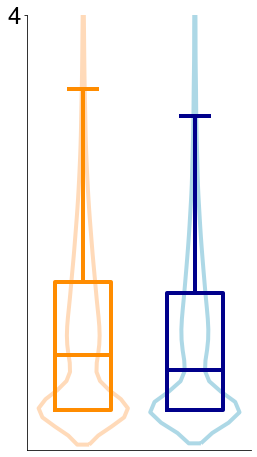

In [264]:
plt.figure(figsize=(4,8))
sns.boxplot(plotting_L23, x='Diagnosis', y='LDHB', fill=False, width=0.5, showfliers=False, 
            hue='Diagnosis', palette=['darkorange', 'darkblue'], linewidth=4)
sns.violinplot(plotting_L23, x='Diagnosis', y='LDHB', fill=False, inner=None, 
            hue='Diagnosis', palette=['peachpuff', 'lightblue'], linewidth=4)
plt.ylim(-0.4,4)
plt.yticks([4], fontsize=24)
plt.ylabel('')
plt.xticks([])
plt.xlabel('')

sns.despine(right=True)
#plt.savefig('LDHB_snRNA.pdf', dpi=1000)

In [148]:
control_means = plotting_L23[plotting_L23['Diagnosis'] == 'Control'].groupby('individual').mean(numeric_only=True).mean()

def compute_logFC(group):
    logFC_values = np.log2(group.iloc[:, :].mean() / control_means)
    return pd.Series(logFC_values, index=group.columns[:])

logFC_df = plotting_L23[plotting_L23['Diagnosis'] == 'ASD'].groupby(['individual', 'Diagnosis']).apply(compute_logFC).reset_index()

In [281]:
#from DOI: 10.1126/science.aav8130
ASD_severity = pd.read_excel("aav8130_data-s1.xlsx", sheet_name=0)

In [282]:
logFC_df_ASD_severity = logFC_df.merge(ASD_severity, left_on='individual', right_on='Patient ID')

In [286]:
ranked_df = logFC_df_ASD_severity[['A','B verbal', 'B nonverbal', 'C', 'D']].rank(method='min', axis=0)
logFC_df_ASD_severity['combined_clinical_score'] = -ranked_df.sum(axis=1)
logFC_df_ASD_severity = logFC_df_ASD_severity[logFC_df_ASD_severity['combined_clinical_score'] != 0]

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


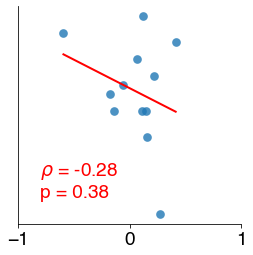

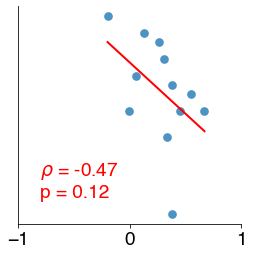

In [267]:
plt.figure(figsize=(4,4))
sns.regplot(data=logFC_df_ASD_severity, x='KHDRBS2', y='combined_clinical_score', ci=False,
                line_kws={"lw": 2, 'color':"red"}, scatter_kws={'linewidth': 0, 's': 75})
plt.ylabel('')
plt.xlabel('')
rho, pval = pearsonr(logFC_df_ASD_severity['KHDRBS2'], logFC_df_ASD_severity['combined_clinical_score'])
plt.text(-.8, -35, f"$\\rho$ = {rho:.2f}\np = {pval:.2f}", fontsize=19, color='red')
plt.xlim(-1,1)
plt.yticks([])
plt.xticks([-1,0,1], fontsize=19)
sns.despine(right=True)
#plt.savefig('KHDRBS2_ADIR.pdf', dpi=1000)

plt.figure(figsize=(4,4))
sns.regplot(data=logFC_df_ASD_severity, x='SLITRK4', y='combined_clinical_score', ci=False,
                line_kws={"lw": 2, 'color':"red"}, scatter_kws={'linewidth': 0, 's': 75})
plt.ylabel('')
plt.xlabel('')
rho, pval = pearsonr(logFC_df_ASD_severity['SLITRK4'], logFC_df_ASD_severity['combined_clinical_score'])
plt.text(-.8, -35, f"$\\rho$ = {rho:.2f}\np = {pval:.2f}", fontsize=19, color='red')
plt.yticks([])
plt.xlim(-1,1)
plt.xticks([-1,0,1], fontsize=19)
sns.despine(right=True)
#plt.savefig('SLITRK4_ADIR.pdf', dpi=1000)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


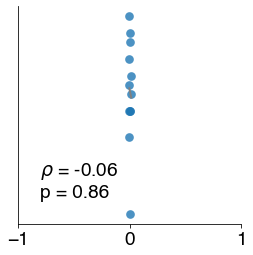

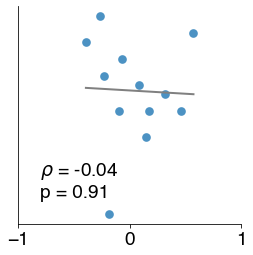

In [268]:
plt.figure(figsize=(4,4))
sns.regplot(data=logFC_df_ASD_severity, x='PROC', y='combined_clinical_score', ci=False,
                line_kws={"lw": 2, 'color':"grey"}, scatter_kws={'linewidth': 0, 's': 75})
plt.ylabel('')
plt.xlabel('')
rho, pval = pearsonr(logFC_df_ASD_severity['PROC'], logFC_df_ASD_severity['combined_clinical_score'])
plt.text(-.8, -35, f"$\\rho$ = {rho:.2f}\np = {pval:.2f}", fontsize=19, color='k')
plt.xlim(-1,1)
plt.yticks([])
plt.xticks([-1,0,1], fontsize=19)
sns.despine(right=True)
#plt.savefig('PROC_ADIR.pdf', dpi=1000)

plt.figure(figsize=(4,4))
sns.regplot(data=logFC_df_ASD_severity, x='LDHB', y='combined_clinical_score', ci=False,
                line_kws={"lw": 2, 'color':"grey"}, scatter_kws={'linewidth': 0, 's': 75})
plt.ylabel('')
plt.xlabel('')
rho, pval = pearsonr(logFC_df_ASD_severity['LDHB'], logFC_df_ASD_severity['combined_clinical_score'])
plt.text(-.8, -35, f"$\\rho$ = {rho:.2f}\np = {pval:.2f}", fontsize=19, color='k')
plt.yticks([])
plt.xlim(-1,1)
plt.xticks([-1,0,1], fontsize=19)
sns.despine(right=True)
#plt.savefig('LDHB_ADIR.pdf', dpi=1000)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


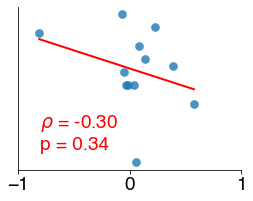

In [153]:
plt.figure(figsize=(4,3))
sns.regplot(data=logFC_df_ASD_severity, x='ANGEL2', y='combined_clinical_score', ci=False,
                line_kws={"lw": 2, 'color':"red"}, scatter_kws={'linewidth': 0, 's': 75})
plt.ylabel('')
plt.xlabel('')
plt.title('')
plt.yticks([])
plt.xticks([-1,0,1], fontsize=19)
plt.xlim(-1,1)
sns.despine(right=True)
rho, pval = pearsonr(logFC_df_ASD_severity['ANGEL2'], logFC_df_ASD_severity['combined_clinical_score'])
plt.text(-.8, -35, f"$\\rho$ = {rho:.2f}\np = {pval:.2f}", fontsize=19, color='red')
#plt.savefig('ANGEL2_ADIR.pdf', dpi=1000)